## Observations and Insights
#### Add your analysis here
---

1. Capomulin and Ramicane appear to be the two most promising drugs. From the sample size of mice, the drug treatment resulted in both the lowest average tumor sizes with the lowest amount of variance between treatments.

2. Ketapril appears to be one of the least effective drugs, with both a high relative tumor volume and high variance in treatment results.

3. There appears to be a fairly strong positive correlation between mouse weight and tumor volume. The higher the weight, the higher the volume of tumor.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceutical_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
pymaceutical_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
pymaceutical_merge["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
pymaceutical_merge["Mouse ID"].value_counts()

g989    13
o287    10
y478    10
c559    10
x581    10
        ..
v199     1
d133     1
f932     1
x226     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
pymaceutical_merge.loc[pymaceutical_merge["Mouse ID"] == "g989", :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceutical_clean = pymaceutical_merge[pymaceutical_merge["Mouse ID"] != "g989"]

In [6]:
# Check the number of mice in the clean DataFrame.
pymaceutical_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pymaceutical_clean.groupby("Drug Regimen")

meanVol = summary_stats["Tumor Volume (mm3)"].mean()
medianVol = summary_stats["Tumor Volume (mm3)"].median()
varianceVol = summary_stats["Tumor Volume (mm3)"].var()
stddevVol = summary_stats["Tumor Volume (mm3)"].std()
stderrVol = summary_stats["Tumor Volume (mm3)"].sem()

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
summary_stats_df = pd.DataFrame({"Mean Tumor Volume": meanVol,
                                 "Median Tumor Volume": medianVol,
                                 "Tumor Volume Variance": varianceVol,
                                 "Tumor Volume Std. Dev.": stddevVol,
                                 "Tumor Volume Std. Err.": stderrVol,})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats2 = pymaceutical_clean.groupby("Drug Regimen")
# Use method to produce everything with a single groupby function
summary_stats_df2 = summary_stats2["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

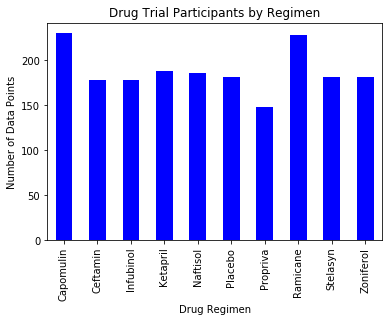

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
pandaBar = pymaceutical_clean.groupby("Drug Regimen")["Mouse ID"].count()

pandaBar.plot(kind = "bar", color='blue')
plt.title("Drug Trial Participants by Regimen")
plt.ylabel("Number of Data Points")


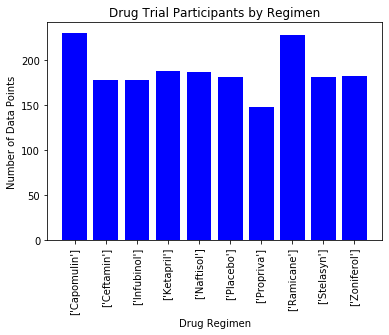

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
xaxis = np.arange(len(summary_stats["Drug Regimen"].unique()))
mousecounts = summary_stats["Mouse ID"].count()
plt.bar(xaxis, mousecounts, color='blue')

plt.xticks(xaxis, summary_stats["Drug Regimen"].unique(), rotation = 90)
plt.title("Drug Trial Participants by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()

Text(0.5, 1.0, 'Mouse Gender')

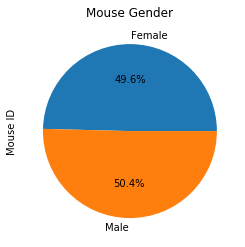

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandaPie = pymaceutical_clean.groupby("Sex")["Mouse ID"].nunique()

pandaPie.plot.pie(autopct='%1.1f%%')
plt.title("Mouse Gender")

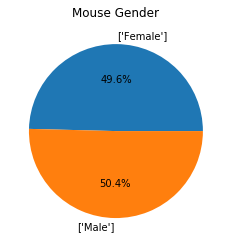

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = pymaceutical_clean.groupby("Sex")["Sex"].unique()
data = pymaceutical_clean.groupby("Sex")["Mouse ID"].nunique()

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title("Mouse Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
maxTimepoints = pymaceutical_clean[pymaceutical_clean.groupby("Mouse ID")["Timepoint"].transform("max") == pymaceutical_clean["Timepoint"]]
maxTimepoints = maxTimepoints[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
maxTimepoints = maxTimepoints.sort_values(by = "Mouse ID", ascending = True)
maxTimepoints = maxTimepoints.reset_index(drop = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxTimepoints

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    outliers = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol = maxTimepoints.loc[maxTimepoints["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset to tumor volume data list
    tumor_vol_list.append(tumorVol)
    # Determine outliers using upper and lower bounds
    quartiles = tumorVol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    for item in tumorVol:
        if (item < lowerq) or (item > upperq):
            outliers.append(item)
            
    print(f"{drug}'s potential outliers: {outliers}\n")
    

Capomulin's potential outliers: [30.48598484, 47.68596303, 41.48300765, 28.43096411, 46.53920617, 41.58152074, 23.34359787, 40.72857787, 31.02392294, 40.65812366, 28.48403281, 31.896238399999998]

Ramicane's potential outliers: [43.04754260000001, 29.12847181, 22.05012627, 30.56462509, 31.09533505, 45.22086888, 43.41938077, 30.27623175, 40.66771292, 43.16637266, 44.18345092, 30.63869575]

Infubinol's potential outliers: [67.97341878, 66.08306589, 72.2267309, 36.321345799999996, 67.28962147, 66.19691151, 47.01036401, 45.69933088, 46.25011212, 51.54243058, 50.00513807, 67.68556862]

Ceftamin's potential outliers: [45.0, 47.784681799999994, 68.92318457, 67.74866174, 46.78453491, 45.0, 45.0, 67.52748237, 45.0, 64.63494887, 68.59474498, 64.72983655]



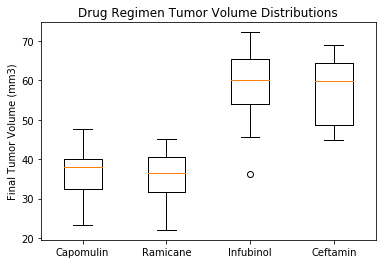

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_list, labels = treatment_list)

plt.title("Drug Regimen Tumor Volume Distributions")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

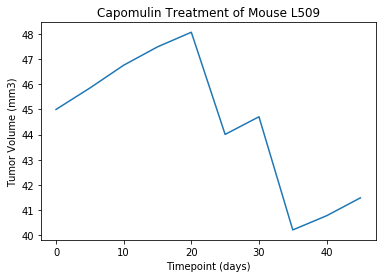

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = pymaceutical_clean.loc[pymaceutical_clean["Mouse ID"] == "l509"]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])

plt.title("Capomulin Treatment of Mouse L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

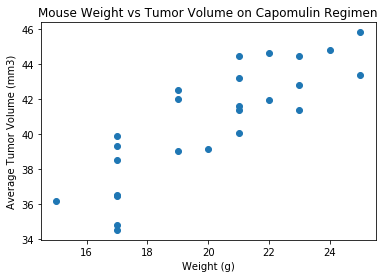

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_treatments = pymaceutical_clean.loc[pymaceutical_clean["Drug Regimen"] == "Capomulin"]
capomulin_treatments_grouped = capomulin_treatments.groupby("Mouse ID")
meanWeight_capo = capomulin_treatments_grouped["Weight (g)"].mean()
meanTumorVol_capo = capomulin_treatments_grouped["Tumor Volume (mm3)"].mean()
plt.scatter(meanWeight_capo, meanTumorVol_capo)

plt.title("Mouse Weight vs Tumor Volume on Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


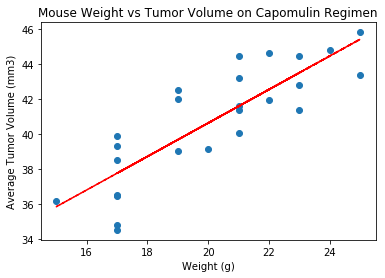

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(meanWeight_capo, meanTumorVol_capo)
c_fit = c_slope * meanWeight_capo + c_int
correlation = st.pearsonr(meanWeight_capo, meanTumorVol_capo)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.scatter(meanWeight_capo, meanTumorVol_capo)
plt.plot(meanWeight_capo,c_fit,"--", color = "red")
plt.title("Mouse Weight vs Tumor Volume on Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()